In [ ]:
!pip install pycaret

Import all the required modules.

In [32]:
from Data_modules import DataLoader, Visualizer, MissingValuesHandler, ModelTimeSeries, ModelMetrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret.anomaly as anomaly

Lets load data and initialize all modules.

In [3]:
visual = Visualizer()
values_handler = MissingValuesHandler()
time_series = ModelTimeSeries()
metrics = ModelMetrics()
enc = OrdinalEncoder(dtype=int)

In [4]:
df = DataLoader().load_data('Data/crypto_market_data_2018_2024.csv')


print(df.head())
print(df.info())
print(df.describe())

                 dates   symbol      open     close      high       low  \
0  2018-01-15 00:00:00  TEL-USD  0.004678  0.006031  0.007141  0.004678   
1  2018-01-16 00:00:00  TEL-USD  0.006056  0.004935  0.006077  0.004112   
2  2018-01-17 00:00:00  TEL-USD  0.004989  0.004539  0.005347  0.003257   
3  2018-01-18 00:00:00  TEL-USD  0.004591  0.007200  0.008505  0.004443   
4  2018-01-19 00:00:00  TEL-USD  0.007133  0.008325  0.008325  0.006071   

       volume  adj_close  
0    842193.0   0.006031  
1    573317.0   0.004935  
2    477139.0   0.004539  
3  15296600.0   0.007200  
4  15603100.0   0.008325  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176745 entries, 0 to 2176744
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   dates      object 
 1   symbol     object 
 2   open       float64
 3   close      float64
 4   high       float64
 5   low        float64
 6   volume     float64
 7   adj_close  float64
dtypes: float64(6), object(2)
memor

Table contain next columns:

dates - entry date (YYYY-MM-DD HH:MM:SS)

symbol - cryptocurrency being traded and currency of trade (CryptoCurrency-Currency)

open - opening price at the beginning of trading (number)

close - closing price at the end of trading (number)

high - highest price durring trading (number)

low - lowest price durring trading (number)

volume - amount of currency traded during the day (number)

adj_close - adjusted closing price (number)

Check missing values in table.

In [5]:
missing_values_statistics = values_handler.get_missing_values_statistics(df)

           Total Count  Missing Values  Missing Percentage
dates          2176745               0                0.00
symbol         2176745               0                0.00
open           2176745           25954                1.19
close          2176745           25954                1.19
high           2176745           25954                1.19
low            2176745           25954                1.19
volume         2176745           25954                1.19
adj_close      2176745           25954                1.19


For time series let's use only 'dates' and 'close' columns.
For this experiment let's use only BTC currency.
Let's rename columns for 'data' and 'value' for easier usage.

In [6]:

df = df[df['symbol'] == 'BTC-USD']
df = df[['dates', 'close']]
df['dates'] = pd.to_datetime(df['dates'])
df = df.sort_values(by='dates', ascending=True)
df.rename({'dates': 'date', 'close': 'value'}, axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

missing_values_statistics = values_handler.get_missing_values_statistics(df)
print(df)

       Total Count  Missing Values  Missing Percentage
date          3696               0                 0.0
value         3696               0                 0.0
                    date         value
0    2015-01-01 00:00:00    314.248993
1    2015-01-02 00:00:00    315.032013
2    2015-01-03 00:00:00    281.082001
3    2015-01-04 00:00:00    264.195007
4    2015-01-05 00:00:00    274.473999
...                  ...           ...
3691 2025-02-08 00:00:00  96482.453125
3692 2025-02-09 00:00:00  96500.093750
3693 2025-02-10 00:00:00  97437.554688
3694 2025-02-11 00:00:00  95747.429688
3695 2025-02-12 16:14:00  95331.765625

[3696 rows x 2 columns]


Visualize table data.

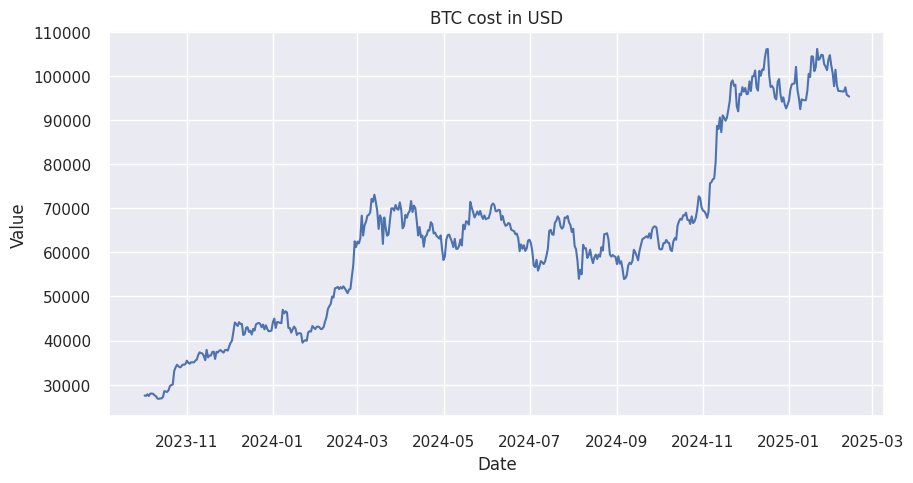

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df[-500:]['date'], df[-500:]['value'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('BTC cost in USD')
plt.show()

For training purpose let's use last 500 entries and for testing purpose last 100 entries.

In [8]:
X_train = df[-600:-100]
X_test = df[-100:]
print(X_train)
print(X_test)

           date         value
3096 2023-06-24  30548.695312
3097 2023-06-25  30480.261719
3098 2023-06-26  30271.130859
3099 2023-06-27  30688.164062
3100 2023-06-28  30086.246094
...         ...           ...
3591 2024-10-31  70215.187500
3592 2024-11-01  69482.468750
3593 2024-11-02  69289.273438
3594 2024-11-03  68741.117188
3595 2024-11-04  67811.507812

[500 rows x 2 columns]
                    date         value
3596 2024-11-05 00:00:00  69359.562500
3597 2024-11-06 00:00:00  75639.078125
3598 2024-11-07 00:00:00  75904.859375
3599 2024-11-08 00:00:00  76545.476562
3600 2024-11-09 00:00:00  76778.867188
...                  ...           ...
3691 2025-02-08 00:00:00  96482.453125
3692 2025-02-09 00:00:00  96500.093750
3693 2025-02-10 00:00:00  97437.554688
3694 2025-02-11 00:00:00  95747.429688
3695 2025-02-12 16:14:00  95331.765625

[100 rows x 2 columns]


Train models using Pycaret and Auto ARIMA.

In [9]:
result = time_series.get_all_models(X_train)


,Description,Value
0,session_id,8391
1,Target,value
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(500, 1)"
5,Transformed data shape,"(500, 1)"
6,Transformed train set shape,"(499, 1)"
7,Transformed test set shape,"(1, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.0885,0.0668,430.0525,430.0525,0.0062,0.0062,0.2833
auto_arima,Auto ARIMA,0.0991,0.0748,481.2047,481.2047,0.0070,0.0069,12.3367
naive,Naive Forecaster,0.1011,0.0763,491.3568,491.3568,0.0071,0.0071,2.3367
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.1102,0.0831,535.0800,535.0800,0.0077,0.0078,0.3133
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.1312,0.0991,637.6827,637.6827,0.0092,0.0092,0.0933
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.1312,0.0991,637.6822,637.6822,0.0092,0.0092,0.0833
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.1312,0.0991,637.6834,637.6834,0.0092,0.0092,0.0933
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.1312,0.0991,637.6844,637.6844,0.0092,0.0092,0.0867
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.1312,0.0991,637.6822,637.6822,0.0092,0.0092,0.2100
ets,ETS,0.1363,0.1029,662.2422,662.2422,0.0096,0.0095,0.2000


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,2024-10-31,0.1220,0.0920,591.9583,591.9583,0.0085,0.0086
1,2024-11-01,0.1149,0.0867,558.2791,558.2791,0.0081,0.0081
2,2024-11-02,0.0288,0.0217,139.9200,139.9200,0.0020,0.0020
Mean,NaT,0.0885,0.0668,430.0525,430.0525,0.0062,0.0062
SD,NaT,0.0424,0.0320,205.6149,205.6149,0.0030,0.0030


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Visualize Pycaret prediction.

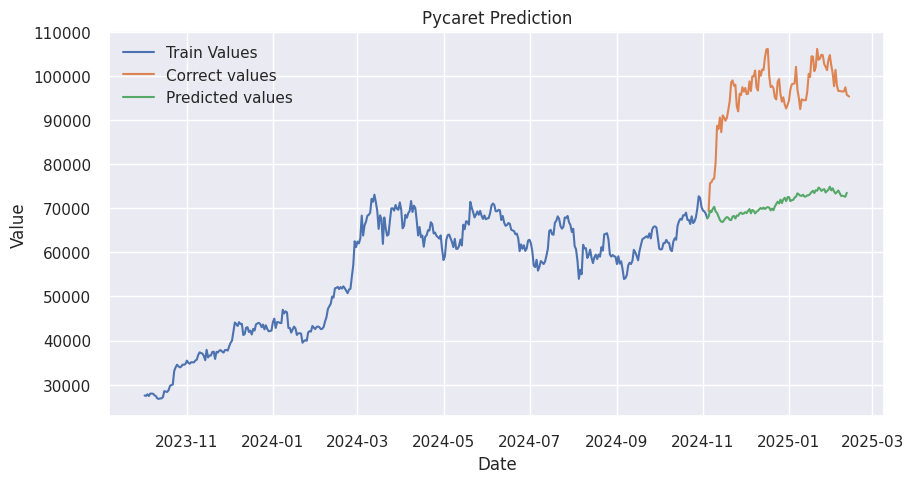

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(df[-500:-100]['date'], df[-500:-100]['value'], label='Train Values')
plt.plot(X_test['date'], X_test['value'], label='Correct values')
plt.plot(result['Pycaret']['predict'].index, result['Pycaret']['predict'], label='Predicted values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Pycaret Prediction')
plt.legend()
plt.show()

Visualize Auto ARIMA prediction.

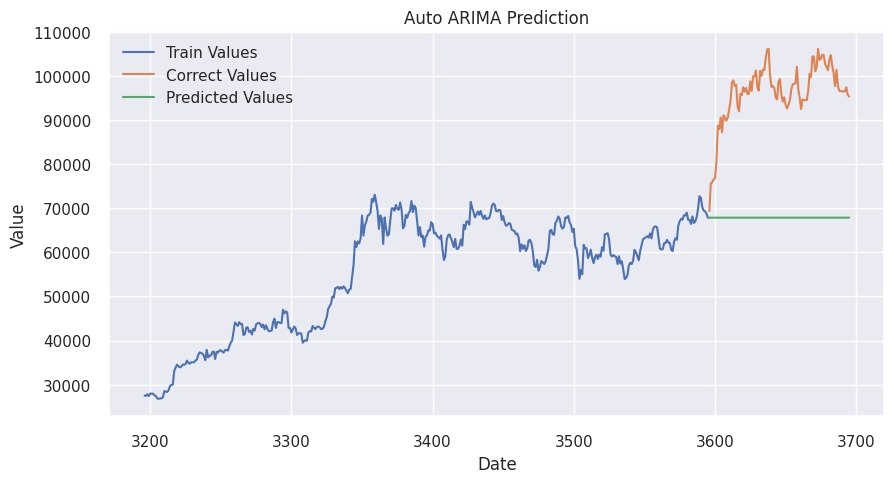

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(df[-500:-100]['date'].index, df[-500:-100]['value'], label='Train Values')
plt.plot(X_test['date'].index, X_test['value'], label='Correct Values')
plt.plot(result['Auto ARIMA']['predict'].index, result['Auto ARIMA']['predict'], label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Prediction')
plt.legend()
plt.show()

Evaluate models metrics.

In [13]:
metrics_results = metrics.get_timeseries_models_metrics(X_test['value'], result)

----------------------
Pycaret model metrics:
Mean Absolute Error (MAE): 25335.725
Mean Squared Error (MSE): 677840546.804
Root Mean Squared Error (RMSE): 26035.371
Mean Absolute Percentage Error (MAPE): 25.940%
----------------------
----------------------
Auto ARIMA model metrics:
Mean Absolute Error (MAE): 28492.549
Mean Squared Error (MSE): 856575702.789
Root Mean Squared Error (RMSE): 29267.315
Mean Absolute Percentage Error (MAPE): 29.177%
----------------------


Let's compare real and predicted values.

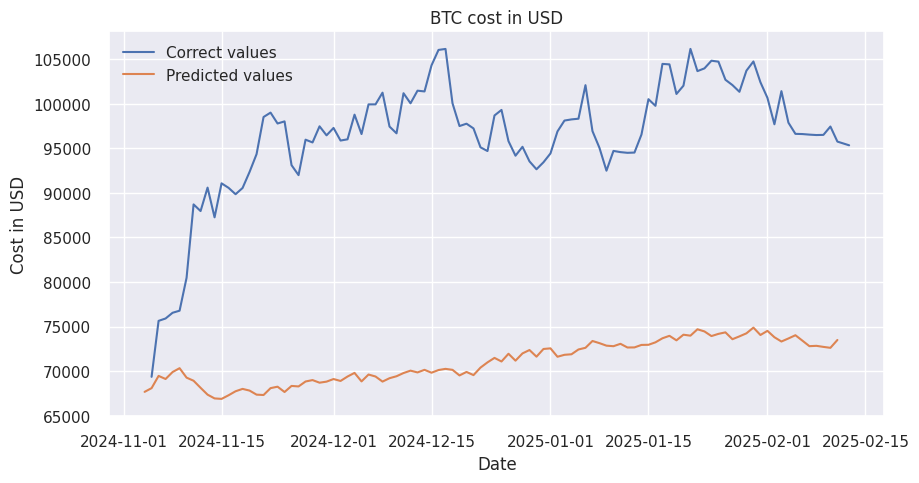

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(X_test['date'], X_test['value'], label='Correct values')
plt.plot(result['Pycaret']['predict'].index, result['Pycaret']['predict'], label='Predicted values')
plt.xlabel('Date')
plt.ylabel('Cost in USD')
plt.title('BTC cost in USD')
plt.legend()
plt.show()

Anomalies detection using pycaret.

In [35]:
predictions = pd.DataFrame(result['Pycaret']['predict'])

anom_exp = anomaly.setup(data=predictions, normalize=True)
anomaly_model = anomaly.create_model('iforest')
anomalies = anomaly.predict_model(anomaly_model, data=predictions)

anomalies['date'] = X_test['date'].index
anomalies.set_index('date', inplace=True)

print(anomalies.head())

,Description,Value
0,Session id,7204
1,Original data shape,"(100, 1)"
2,Transformed data shape,"(100, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

        y_pred  Anomaly  Anomaly_Score
date                                  
3596 -1.451279        0      -0.048680
3597 -1.269881        0      -0.093860
3598 -0.674810        0      -0.120213
3599 -0.825606        0      -0.107111
3600 -0.486940        0      -0.112709


Mark anomaly values visually.

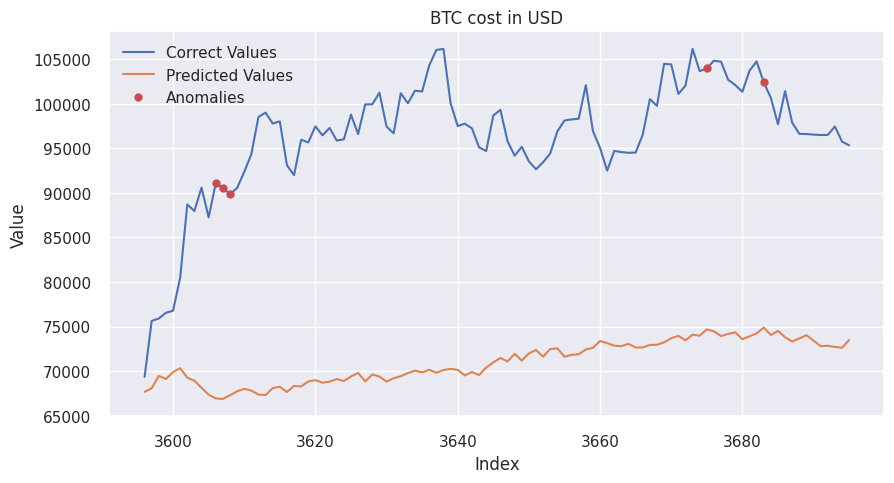

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(X_test['date'].index, X_test['value'], label='Correct Values')
plt.plot(X_test['date'].index, predictions, label='Predicted Values')
plt.plot(anomalies[anomalies['Anomaly'] == 1].index, X_test[anomalies['Anomaly'] == 1]['value'], 'ro', label='Anomalies')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('BTC cost in USD')
plt.legend()
plt.show()